In [11]:
import pandas as pd
import networkx as nx

In [12]:
import os

With the packages imported, we now proceed to do some setup, loading the csv and limiting the size of the dataframe for sanity's sake.  This limits us to 66 reviewers, rather than all 610.

In [13]:
os.chdir('C:\\Users\\Jason\\Documents\\Class Material\\Graph Analytics')

In [14]:
ratings_df=pd.read_csv('ratings.csv')

In [15]:
numrows=10324
ratings_df=ratings_df.head(numrows)
restricted_ratings_df=pd.DataFrame()

Now we initialize a some variables.

In [16]:
reviewer_num=0
elist=[] #edge list
movies_g=nx.Graph()

We now restrict ourselves to the first 50 movies for each reviewer, preventing this from potentially having 2^10000 edges, which is a bit extreme.

In [17]:
for i in range(numrows):
    if reviewer_num!=ratings_df.iat[i,0]:
        reviewer_num=ratings_df.iat[i,0]
        movie_number=0
        restricted_ratings_df=restricted_ratings_df.append(ratings_df.iloc[[i]])
    elif movie_number<50:
        movie_number=movie_number+1
        restricted_ratings_df=restricted_ratings_df.append(ratings_df.iloc[[i]])

Now, we construct the list of edges, which is all movies that were rated by the same person.  I was curious to see if there were any reviewers who had a group of movies that were separate from other reviewers.  

In [20]:
for i in range(len(restricted_ratings_df.index)):
    for j in range(50):
        if i+j<len(restricted_ratings_df.index):
            if restricted_ratings_df.iat[i,0]==restricted_ratings_df.iat[i+j,0]:
                new_tuple=(restricted_ratings_df.iat[i,1],restricted_ratings_df.iat[i+j,1])
                elist.append(new_tuple)

In [21]:
movies_g.add_edges_from(elist)

In [22]:
print(nx.diameter(movies_g))

3


In [23]:
print(nx.density(movies_g))

0.09917557835119822


It seems that most people reviewed the same movies, given the limited diameter of the graph, however, about 10% of the movies were actually reviewed by all 66 reviewers.  Taking a look, we see:

In [24]:
nx.draw(movies_g)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


NetworkX is using depreciated code, that's nice, let's actually see the graph:

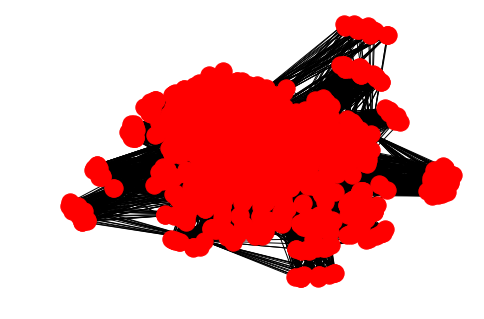

In [25]:
nx.draw(movies_g)

We can see some side clusters, which could be found and labeled, however that is outside the scope of this assignment.  However, we do see how most of the movies are clustered, showing multiple reviewers.